Lecture 76: Collecting the Web Graph

20 ----> 158.2
21 ----> 126.0
22 ----> 123.9
23 ----> 123.3
24 ----> 154.5
25 ----> 139.3
26 ----> 139.1
27 ----> 123.9
28 ----> 164.2
29 ----> 154.0
30 ----> 164.8
31 ----> 145.2
32 ----> 156.5
33 ----> 165.9
34 ----> 178.7
35 ----> 200.8
36 ----> 147.6
37 ----> 239.6
38 ----> 190.8
39 ----> 214.3
40 ----> 184.8
41 ----> 252.8
42 ----> 254.6
43 ----> 237.2
44 ----> 250.3
45 ----> 278.3
46 ----> 286.4
47 ----> 232.3
48 ----> 234.0
49 ----> 253.3
50 ----> 267.4
51 ----> 243.8
52 ----> 251.0
53 ----> 267.5
54 ----> 305.5
55 ----> 278.8
56 ----> 344.9
57 ----> 302.7
58 ----> 311.0
59 ----> 351.5
60 ----> 356.0
61 ----> 357.4
62 ----> 302.5
63 ----> 345.3
64 ----> 354.6
65 ----> 372.4
66 ----> 368.3
67 ----> 335.1
68 ----> 382.2
69 ----> 378.3
70 ----> 354.8
71 ----> 348.9
72 ----> 369.5
73 ----> 414.0
74 ----> 389.4
75 ----> 381.6
76 ----> 404.5
77 ----> 456.3
78 ----> 512.3
79 ----> 417.3
80 ----> 529.4
81 ----> 419.4
82 ----> 390.9
83 ----> 475.9
84 ----> 464.3
85 ----> 490.5
86 ----> 4

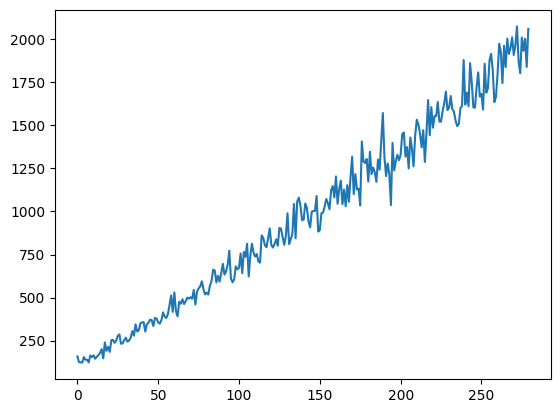

In [13]:

import matplotlib.pyplot as plt
import networkx as nx
import numpy 
import random

def walk(n, p):
    start = random.randint(0, n-1)
    G = nx.erdos_renyi_graph(n, p)
    S = set([])
    v = start
    count = 0
    while len(S) < n:
        Nbr = list(nx.neighbors(G, v))  # Convert to list
        if not Nbr:  # In case there are no neighbors
            break
        v = random.choice(Nbr)
        S.add(v)
        count += 1
    return count

l = []
for i in range(20, 300):
    z = []
    for j in range(10):
        z.append(walk(i, 0.3))
    l.append(numpy.average(z))
    print(i,"---->",numpy.average(z))
plt.plot(l)
plt.show()


Lecture 81: Implementing PageRank Using Points Distribution Method-2

In [19]:
import networkx as nx
import random

def add_edge(G, p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = random.random()
                if r <= p:
                    G.add_edge(i, j)  # Corrected method
                else:
                    continue
    return G

def initialize_points(G):
    points = [100 for i in range(G.number_of_nodes())]
    return points  # Make sure to return points

def distribute_points(G, points):
    prev_points = points
    new_points = [0 for i in range(G.number_of_nodes())]

    for i in G.nodes():
        out = list(G.out_edges(i))  # Convert to list
        if len(out) == 0:
            new_points[i] += prev_points[i]
        else:
            share = float(prev_points[i]) / len(out)
            for each in out:
                new_points[each[1]] += share

    return G, new_points

def keep_distributing_points(G, points):
    prev_points = points
    print('Enter # to stop')
    while True:
        G, new_points = distribute_points(G, prev_points)  # Use prev_points
        print(new_points)

        char = input()  # Changed raw_input to input for Python 3
        if char == '#':
            break
        prev_points = new_points

    return G, new_points

def main():
    # Create a directed graph with 10 nodes
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(10)])
    G = add_edge(G, 0.3)
    
    # Assign 100 points to each node
    points = initialize_points(G)
    
    # Keep distributing points until convergence
    G, points = keep_distributing_points(G, points)

main()


Enter # to stop
[40.0, 98.33333333333334, 86.66666666666667, 120.0, 153.33333333333334, 148.33333333333334, 136.66666666666669, 158.33333333333334, 58.333333333333336, 0]
[11.666666666666668, 59.16666666666667, 53.333333333333336, 137.5, 212.77777777777777, 135.0, 142.77777777777777, 160.83333333333334, 86.94444444444446, 0]
[17.388888888888893, 56.97222222222222, 49.72222222222223, 153.36111111111111, 206.0, 128.5, 163.88888888888889, 134.86111111111111, 89.30555555555556, 0]
[17.86111111111111, 64.62962962962963, 56.91666666666667, 149.34722222222223, 191.3148148148148, 138.4398148148148, 153.75, 141.81481481481484, 85.92592592592592, 0]
[17.185185185185183, 61.576388888888886, 55.736111111111114, 145.15740740740742, 202.89660493827162, 137.71990740740742, 148.88271604938274, 145.13657407407408, 85.70910493827162, 0]
[17.141820987654324, 60.0908950617284, 54.114197530864196, 149.37831790123457, 203.2405864197531, 133.53649691358027, 155.55555555555557, 141.3425925925926, 85.599537037

Lecture 82: Implementing PageRank Using Points Distribution Method-3

In [21]:
import networkx as nx
import random
import numpy as np

def add_edge(G, p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = random.random()
                if r <= p:
                    G.add_edge(i, j)  # Corrected method
                else:
                    continue
    return G

def initialize_points(G):
    points = [100 for i in range(G.number_of_nodes())]
    return points  # Make sure to return points

def distribute_points(G, points):
    prev_points = points
    new_points = [0 for i in range(G.number_of_nodes())]

    for i in G.nodes():
        out = list(G.out_edges(i))  # Convert to list
        if len(out) == 0:
            new_points[i] += prev_points[i]
        else:
            share = float(prev_points[i]) / len(out)
            for each in out:
                new_points[each[1]] += share

    return G, new_points

def keep_distributing_points(G, points):
    prev_points = points
    print('Enter # to stop')
    while True:
        G, new_points = distribute_points(G, prev_points)  # Use prev_points
        print(new_points)

        char = input()  # Changed raw_input to input for Python 3
        if char == '#':
            break
        prev_points = new_points

    return G, new_points

def get_nodes_sorted_by_points(points):
  points_array = np.array(points)
  nodes_sorted_by_points=np.argsort(-points_array)  
  return nodes_sorted_by_points

def main():
    # Create a directed graph with 10 nodes
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(10)])
    G = add_edge(G, 0.3)
    
    # Assign 100 points to each node
    points = initialize_points(G)
    print(points)
    
    # Keep distributing points until convergence
    G, points = keep_distributing_points(G, points)

    # Get nodes ranking as per the points accumulated
    nodes_sorted_by_points=get_nodes_sorted_by_points(points)
    print('Nodes sorted by points ',nodes_sorted_by_points)

    #compare the ranks thus obtained with the ranks obtained from the inbuilt Page Rank method
    pr = nx.pagerank(G)
    pr_sorted = sorted(pr.items(), key = lambda x:x[1],reverse=True)
    for i in pr_sorted:
        print(i[0],)

main()


[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Enter # to stop
[33.333333333333336, 166.66666666666669, 83.33333333333334, 183.33333333333334, 0, 50.0, 133.33333333333334, 150.0, 150.0, 50.0]
[27.777777777777782, 261.1111111111111, 116.66666666666667, 266.6666666666667, 0, 83.33333333333334, 77.77777777777779, 33.333333333333336, 133.33333333333334, 0.0]
[38.88888888888889, 350.00000000000006, 83.33333333333334, 116.66666666666669, 0, 130.55555555555554, 38.88888888888889, 27.777777777777782, 213.88888888888889, 0.0]
[27.777777777777782, 215.74074074074076, 90.74074074074073, 118.51851851851852, 0, 175.00000000000003, 27.777777777777782, 38.88888888888889, 305.55555555555554, 0.0]
[30.24691358024691, 250.61728395061726, 115.74074074074073, 154.62962962962962, 0, 107.87037037037038, 30.24691358024691, 27.777777777777782, 282.87037037037044, 0.0]
[38.58024691358025, 287.5, 109.4135802469136, 137.1913580246914, 0, 125.30864197530863, 38.58024691358025, 30.24691358024691, 233.179012345

Lecture 83: Implementing PageRank Using Points Distribution Method-4

In [23]:
import networkx as nx
import random
import numpy as np

def add_edge(G, p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = random.random()
                if r <= p:
                    G.add_edge(i, j)  # Corrected method
                else:
                    continue
    return G

def initialize_points(G):
    points = [100 for i in range(G.number_of_nodes())]
    return points  # Make sure to return points

def distribute_points(G, points):
    prev_points = points
    new_points = [0 for i in range(G.number_of_nodes())]

    for i in G.nodes():
        out = list(G.out_edges(i))  # Convert to list
        if len(out) == 0:
            new_points[i] += prev_points[i]
        else:
            share = float(prev_points[i]) / len(out)
            for each in out:
                new_points[each[1]] += share

    return G, new_points

def handle_points_sink(G,points):
    for i in range(len(points)):
        points[i] = (float)(points[i])*0.8
    n = G.number_of_nodes()
    extra=((float)(n)*100*0.2)/n
    for i in range(len(points)):
        points[i]+=extra
    return points

def keep_distributing_points(G, points):
    prev_points = points
    print('Enter # to stop')
    while True:
        G, new_points = distribute_points(G, prev_points)  # Use prev_points
        print(new_points)

        new_points = handle_points_sink(G, new_points)

        char = input()  # Changed raw_input to input for Python 3
        if char == '#':
            break
        prev_points = new_points

    return G, new_points

def get_nodes_sorted_by_points(points):
  points_array = np.array(points)
  nodes_sorted_by_points=np.argsort(-points_array)  
  return nodes_sorted_by_points

def main():
    # Create a directed graph with 10 nodes
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(10)])
    G = add_edge(G, 0.3)
    
    # Assign 100 points to each node
    points = initialize_points(G)
    print(points)
    
    # Keep distributing points until convergence
    G, points = keep_distributing_points(G, points)

    # Get nodes ranking as per the points accumulated
    nodes_sorted_by_points=get_nodes_sorted_by_points(points)
    print('Nodes sorted by points ',nodes_sorted_by_points)

    #compare the ranks thus obtained with the ranks obtained from the inbuilt Page Rank method
    pr = nx.pagerank(G)
    pr_sorted = sorted(pr.items(), key = lambda x:x[1],reverse=True)
    for i in pr_sorted:
        print(i[0],end="")

main()


[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Enter # to stop
[103.33333333333334, 33.333333333333336, 123.33333333333334, 186.66666666666669, 73.33333333333334, 86.66666666666667, 186.66666666666669, 70.0, 36.66666666666667, 100.0]
[131.42222222222225, 29.777777777777782, 103.06666666666668, 140.08888888888893, 82.4, 74.31111111111112, 183.64444444444447, 98.0888888888889, 41.644444444444446, 115.55555555555557]
[126.83792592592596, 26.48296296296296, 97.66696296296297, 149.86903703703706, 83.58992592592594, 89.56681481481483, 177.40088888888891, 89.35644444444446, 33.71792592592593, 125.51111111111115]
[128.953307654321, 30.551150617283955, 99.34973629629633, 151.37823604938274, 86.41237333333336, 85.89659654320991, 172.22501135802472, 88.8170113580247, 34.843440987654326, 121.57313580246915]
[127.30684375967081, 29.572425744855977, 99.36873634238685, 152.87129715884777, 85.5174091325103, 87.19886496131689, 172.73493133168728, 88.2206742123457, 35.62733785020577, 121.58147950617

Lecture 85: Implementing PageRank Using Random Walk Method -2

In [7]:
import networkx as nx
import random
import numpy as np

def add_edges(G, p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = random.random()
                if r <= p:
                    G.add_edge(i, j)
    return G

def get_nodes_sorted_by_RW(points):
    points_array = np.array(points)
    nodes_sorted_by_RW = np.argsort(-points_array)  # Sort nodes by points in descending order
    return nodes_sorted_by_RW

def random_walk(G):
    nodes = list(G.nodes())  # Convert nodes to list
    RW_points = [0 for _ in range(G.number_of_nodes())]
    
    r = random.choice(nodes)  # Choose random node
    RW_points[r] += 1  # Increment the count for the selected node
    
    out = list(G.out_edges(r))  # Convert out_edges to list
    
    c = 0
    while c != 100000:
        if len(out) == 0:
            focus = random.choice(nodes)  # Choose a new random node if no outgoing edges
        else:
            r1 = random.choice(out)
            focus = r1[1]  # Get the destination node from the edge
        RW_points[focus] += 1  # Increment the count for the focused node
        out = list(G.out_edges(focus))  # Update outgoing edges for the focused node
        c += 1
    
    return RW_points

def main():
    # 1. Create a directed graph
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(10)])  # Add 10 nodes
    G = add_edges(G, 0.3)  # Add edges with a 0.3 probability
    
    # 2. Perform a random walk
    RW_points = random_walk(G)
    
    # 3. Get sorted nodes as per points accumulated during random walk
    nodes_sorted_by_RW = get_nodes_sorted_by_RW(RW_points)
    print("Nodes sorted by random walk:", nodes_sorted_by_RW)
    
    # 4. Compare results with the built-in PageRank method
    pr = nx.pagerank(G)
    pr_sorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    
    print("Nodes sorted by PageRank:")
    for i in pr_sorted:
        print(i[0], end=" ")
    print(pr)

main()


Nodes sorted by random walk: [0 6 8 2 3 4 9 5 7 1]
Nodes sorted by PageRank:
0 8 6 2 3 9 4 5 7 1 {0: 0.13092600758340864, 1: 0.06019624116977465, 2: 0.10379275254608168, 3: 0.10074394873495107, 4: 0.09298305249008997, 5: 0.08654154381122779, 6: 0.12469258355181054, 7: 0.0812918950774934, 8: 0.1252639362097257, 9: 0.0935680388254365}


Lecture 86: DegreeRank versus PageRank